This plots ROI values extracted from images that have been normalized using DARTEL, 
but the values have been extracted from ROI derived from a prior analysis done using images normalized using DARTEL.

In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline
%run /home/grg/git/alfa/roicollect.py

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/grg/jupyter/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


This collect the values from \*\_stats.csv files, i.e. values that have been extracted from ROI manually drawn in MNI space.
The bad thing with this is that the ROI is defined in a reference space. This is subject to individual registration errors.

using default groups
Standard deviation of label Inferior fronto-occipital fasciculus R: 0.0300871635314
Model used for correction: roi ~ 1 + gender
Standard deviation after correction for covariates: 0.0300548798682
Region: Inferior fronto-occipital fasciculus R
0.0446712791643
0.148944580679
0.548489071341
Standard deviation of label Inferior longitudinal fasciculus L: 0.0279346606459
Model used for correction: roi ~ 1 + gender
Standard deviation after correction for covariates: 0.0279068549772
Region: Inferior longitudinal fasciculus L
0.0274446881065
0.0244798565111
0.903358479007
Standard deviation of label Inferior longitudinal fasciculus R: 0.0329257309886
Model used for correction: roi ~ 1 + gender
Standard deviation after correction for covariates: 0.0327073844104
Region: Inferior longitudinal fasciculus R
0.0442176654704
0.0997081694997
0.638569149586
Standard deviation of label Superior longitudinal fasciculus L: 0.0284177802455
Model used for correction: roi ~ 1 + gender
St

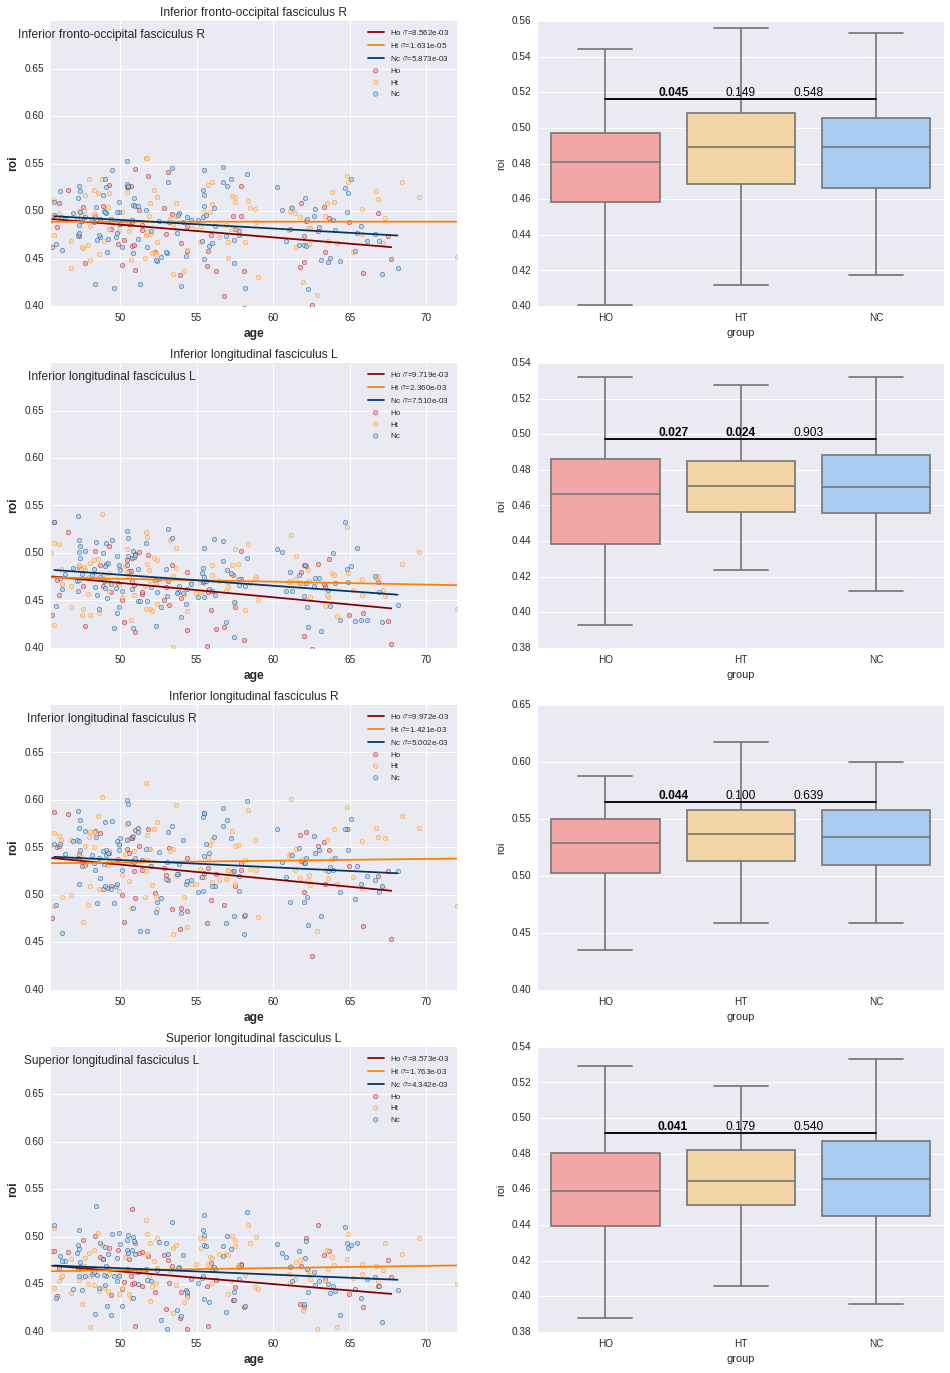

In [2]:
regions = range(12, 16)
#for x in [9]: #,10,11,12,13]:
#    regions.remove(x)
names = {1: 'Anterior thalamic radiation L',
 2: 'Anterior thalamic radiation R',
 3: 'Corticospinal tract L',
 4: 'Corticospinal tract R',
 5: 'Cingulum (cingulate gyrus) L',
 6: 'Cingulum (cingulate gyrus) R',
 7: 'Cingulum (hippocampus) L',
 8: 'Cingulum (hippocampus) R',
 9: 'Forceps major',
 10: 'Forceps minor',
 11: 'Inferior fronto-occipital fasciculus L',
 12: 'Inferior fronto-occipital fasciculus R',
 13: 'Inferior longitudinal fasciculus L',
 14: 'Inferior longitudinal fasciculus R',
 15: 'Superior longitudinal fasciculus L',
 16: 'Superior longitudinal fasciculus R',
 17: 'Uncinate fasciculus L',
 18: 'Uncinate fasciculus R',
 19: 'Superior longitudinal fasciculus (temporal part) L',
 20: 'Superior longitudinal fasciculus (temporal part) R'}

data = pd.read_excel('/home/grg/spm/data/covariates.xls')
data = data.set_index(data['subject'])
data = data.sort_values(['apo', 'subject'])
src = '/home/grg/roivalues/roivalues_tracts_tbss_FA_skel/'
filepattern = '*_stats.csv'
csvfiles = glob(osp.join(src, filepattern))
subjects = [string.atoi(e.split('/')[-1].split('_')[0]) for e in csvfiles]

to_remove = [10551, 10397, 11383, 13083, 10701, 21092] # failed DARTEL subjects

# remove wrong subjects
data = data[~data['subject'].isin(to_remove)]
for e in to_remove:
    if e in subjects:
        s = subjects.index(e)
        subjects.pop(s)
        csvfiles.pop(s)

#data.join(values)
#poly = ols(formula='roi ~ 1 + age', data=data.join(values)).fit()
plot_regions(data, regions, csvfiles, subjects,  names=names,ylim=[0.4,0.7])